# Assignment 1A: Anscomb's quartet
Start by downloading these four datasets: Data 1, Data 2, Data 3, and Data 4. The format is .tsv, which stands for tab separated values. Each file has two columns (separated using the tab character). The first column is xx-values, and the second column is yy-values.

It's ok to just download these files to disk by right-clicking on each one, but if you use Python and urllib or urllib2 to get them, I'll really be impressed. If you don't know how to do that, I recommend opening up Google and typing "download file using Python" or something like that. When interpreting the search results remember that stackoverflow is your friend

### First we download the datasets and make them into a numpy array so it can be used with the fast datastructure numpy is providing

In [1]:
from urllib2 import urlopen
from StringIO import StringIO

# Import numpy
import numpy as np

# Get data 1 file from the net and put it into an numpy array
idata1 = urlopen('https://dl.dropboxusercontent.com/u/153071/teaching/02806_2016/data1.tsv').read()
data1 = np.genfromtxt(StringIO(idata1))

# Get data 2 file from the net and put it into an numpy array
idata2 = urlopen('https://dl.dropboxusercontent.com/u/153071/teaching/02806_2016/data2.tsv').read()
data2 = np.genfromtxt(StringIO(idata2))

# Get data 3 file from the net and put it into an numpy array
idata3 = urlopen('https://dl.dropboxusercontent.com/u/153071/teaching/02806_2016/data3.tsv').read()
data3 = np.genfromtxt(StringIO(idata3))

# Get data 4 file from the net and put it into an numpy array
idata4 = urlopen('https://dl.dropboxusercontent.com/u/153071/teaching/02806_2016/data4.tsv').read()
data4 = np.genfromtxt(StringIO(idata4))

### Using the numpy function mean, calculate the mean of both x-values and y-values for each dataset. 

In [2]:
# Calculate mean of column as axis x and y
meanData1 = np.mean(data1, axis=0)
meanData2 = np.mean(data2, axis=0)
meanData3 = np.mean(data3, axis=0)
meanData4 = np.mean(data4, axis=0)

### Use python string formatting to print precisely two decimal places of these results to the output cell. Check out [this _stackoverflow_ page](http://stackoverflow.com/questions/8885663/how-to-format-a-floating-number-to-fixed-width-in-python) for help with the string formatting. 

In [3]:
# Print data values as data name x: value y: value where value is in format of 0.00
print "data1 x:" + "{:10.2f}".format(meanData1[0]) + " y:" + "{:10.2f}".format(meanData1[1])
print "data2 x:" + "{:10.2f}".format(meanData2[0]) + " y:" + "{:10.2f}".format(meanData2[1])
print "data3 x:" + "{:10.2f}".format(meanData3[0]) + " y:" + "{:10.2f}".format(meanData3[1])
print "data4 x:" + "{:10.2f}".format(meanData4[0]) + " y:" + "{:10.2f}".format(meanData4[1])

data1 x:      9.00 y:      7.50
data2 x:      9.00 y:      7.50
data3 x:      9.00 y:      7.50
data4 x:      9.00 y:      7.50


### Now calculate the variance for all of the various sets of $x$- and $y$-values (to three decimal places).

In [4]:
# calculate variance to three decimals
varData1 = np.around(np.var(data1, axis=0), decimals=3)
varData2 = np.around(np.var(data2, axis=0), decimals=3)
varData3 = np.around(np.var(data3, axis=0), decimals=3)
varData4 = np.around(np.var(data4, axis=0), decimals=3)

print varData1
print varData2
print varData3
print varData4

[ 10.      3.752]
[ 10.      3.752]
[ 10.      3.748]
[ 10.      3.748]


### Use `numpy` to calculate the [Pearson correlation](https://en.wikipedia.org/wiki/Pearson_product-moment_correlation_coefficient) between $x$- and $y$-values for all four data sets (also to three decimal places).

In [5]:
# calculate the  Pearson correlation 
perData1 = np.around(np.corrcoef(data1[:,0], data1[:,1])[0, 1], decimals=3)
perData2 = np.around(np.corrcoef(data2[:,0], data2[:,1])[0, 1], decimals=3)
perData3 = np.around(np.corrcoef(data3[:,0], data3[:,1])[0, 1], decimals=3)
perData4 = np.around(np.corrcoef(data4[:,0], data4[:,1])[0, 1], decimals=3)

print perData1
print perData2
print perData3
print perData4

0.816
0.816
0.816
0.817


### The next step is use _linear regression_ to fit a straight line $f(x) = a x + b$ through each dataset and report $a$ and $b$ (to two decimal places). An easy way to fit a straight line in Python is using `scipy`'s `linregress`. It works like this
> ```
> from scipy import stats
> slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
>```

In [6]:
# import stats from scipy
from scipy import stats

# get the data for the linregress for each dataset
data1slope, data1intercept, data1r_value, data1p_value, data1std_err = stats.linregress(data1)
data2slope, data2intercept, data2r_value, data2p_value, data2std_err = stats.linregress(data2)
data3slope, data3intercept, data3r_value, data3p_value, data3std_err = stats.linregress(data3)
data4slope, data4intercept, data4r_value, data4p_value, data4std_err = stats.linregress(data4)

### Finally, it's time to plot the four datasets using `matplotlib.pyplot`. Use a two-by-two [`subplot`](http://matplotlib.org/examples/pylab_examples/subplot_demo.html) to put all of the plots nicely in a grid and use the same $x$ and $y$ range for all four plots. And include the linear fit in all four plots. (To get a sense of what I think the plot should look like, you can take a look at my version [here](https://dl.dropboxusercontent.com/u/153071/teaching/02806_2016/anscombe.png).)

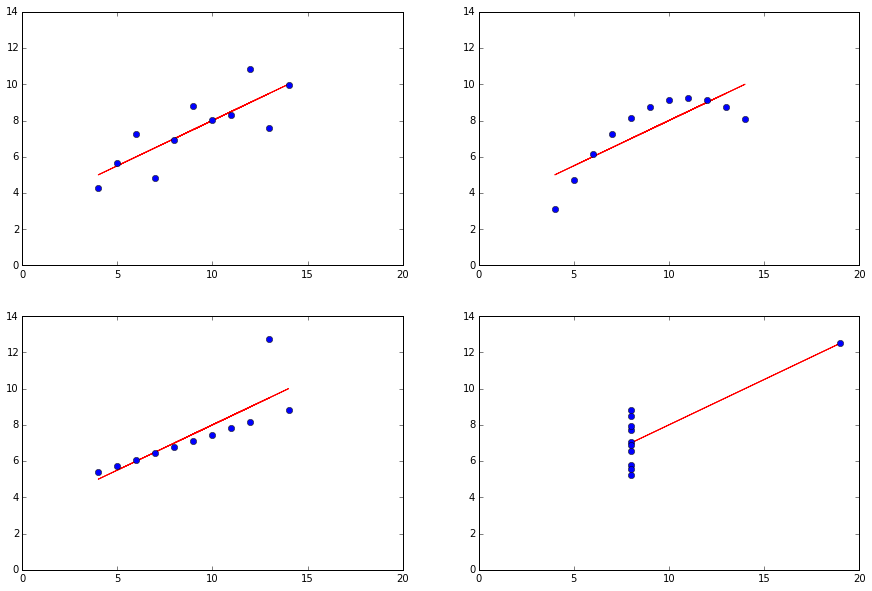

In [7]:
# Make plot inline
%matplotlib inline
#import matplotlib
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15, 10))

# make first plot from data1 set it in left upper corner
plt.subplot(2, 2, 1)

# set limits of plot
plt.xlim([0,20])
plt.ylim([0,14])

# make the linregression in format ax+b
line1 = data1slope*data1[:,0]+data1intercept

#insert datapoints and linregressinon into plot
plt.plot(data1[:,0],line1,'r-',data1[:,0],data1[:,1],'o')


# make second plot from data1 set it in left upper corner
plt.subplot(2, 2, 2)

# set limits of plot
plt.xlim([0,20])
plt.ylim([0,14])

# make the linregression in format ax+b
line2 = data2slope*data2[:,0]+data2intercept

#insert datapoints and linregressinon into plot
plt.plot(data2[:,0],line2,'r-',data2[:,0],data2[:,1],'o')


# make third plot from data1 set it in left upper corner
plt.subplot(2, 2, 3)

# set limits of plot
plt.xlim([0,20])
plt.ylim([0,14])

# make the linregression in format ax+b
line3 = data3slope*data3[:,0]+data3intercept

#insert datapoints and linregressinon into plot
plt.plot(data3[:,0],line3,'r-',data3[:,0],data3[:,1],'o')


# make third plot from data1 set it in left upper corner
plt.subplot(2, 2, 4)

# set limits of plot
plt.xlim([0,20])
plt.ylim([0,14])

# make the linregression in format ax+b
line4 = data4slope*data4[:,0]+data4intercept

#insert datapoints and linregressinon into plot
plt.plot(data4[:,0],line4,'r-',data4[:,0],data4[:,1],'o')

# show the plot
plt.show()

### Explain - in your own words - what you think my point with this exercise is.

The point with the exercise is to show the simpson paradox, and how if you look at the data the visually you can see that it is very different. But if you look at the pure numbers from the top, the data look very similar therefore the conclusions sometimes needs to be visualized for one to get a point across

# Assignment 1B: Slicing data

In [52]:
# import csv utilities
import csv

# focus crimes
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])

# load data into dict
incedents = []
allIncedents = []
with open('SFPD_Incidents_-_from_1_January_2003.csv') as f:
    reader = csv.DictReader(f, delimiter=',')
    for row in reader:
        allIncedents.append({"Category" : row['Category'], "DayOfWeek" : row['DayOfWeek'], "Date" : row['Date'], 
                              "Time" : row['Time'], "PdDistrict" : row['PdDistrict'], "Address" : row['Address'],
                              "X" : row['X'], "Y" : row['Y']})
        if (row['Category'] in focuscrimes):
            incedents.append({"Category" : row['Category'], "DayOfWeek" : row['DayOfWeek'], "Date" : row['Date'], 
                              "Time" : row['Time'], "PdDistrict" : row['PdDistrict'], "Address" : row['Address'],
                              "X" : row['X'], "Y" : row['Y']})

###  We'll be combining information about _PdDistrict_ and _Category_ to explore differences between SF's neighborhoods. First, simply list the names of SF's 10 police districts.

In [53]:
# import counter from collection
from collections import Counter


# Make district counter
policeCombined = Counter()
policeDistricts = Counter()

# Get districts with crime numnbers
for incedent in incedents:
    policeCombined[incedent['PdDistrict'],incedent["Category"]] += 1
    policeDistricts[incedent['PdDistrict']] += 1
    
# print districts
print policeDistricts.keys()

['', 'CENTRAL', 'NORTHERN', 'PARK', 'SOUTHERN', 'MISSION', 'TENDERLOIN', 'RICHMOND', 'TARAVAL', 'INGLESIDE', 'BAYVIEW']


### Which has the most crimes? Which has the most focus crimes?

In [54]:
# most crimes
print "The police district %s, have the most crime with %d counts of crimes." % policeDistricts.most_common()[0]
# most focus crimes"
print "The police district "+policeCombined.most_common()[0][0][0]+", have the most focus crime with " + str(policeCombined.most_common()[0][1])+ " counts of "+policeCombined.most_common()[0][0][1]+"."

The police district SOUTHERN, have the most crime with 192127 counts of crimes.
The police district SOUTHERN, have the most focus crime with 92392 counts of LARCENY/THEFT.


## Next, we want to generate a slightly more complicated graphic. I'm interested to know if there are certain crimes that happen much more in certain neighborhoods than what's typical. Below I describe how to get that plot going

### First, we need to calculate the relative probabilities of seeing each type of crime in the dataset as a whole. That's simply a normalized version of this plot. Let's call it P(crime).

In [55]:
# import division
from __future__ import division

# The occurrences of crimes
PCrime = Counter()

for incedent in incedents:
    PCrime[incedent['Category']] += 1

for occurrence in PCrime.keys():
    PCrime[occurrence] = PCrime[occurrence]/len(allIncedents)

### Next, we calculate that same probability distribution but for each PD district, let's call that P(crime|district).

In [70]:
PCrimeDistrict = {}

# The occurrences of crimes in district
for occurrence in policeCombined.keys():
    PCrimeDistrict[occurrence] = policeCombined[occurrence]/policeDistricts[occurrence[0]]

### Now we look at the ratio P(crime|district)/P(crime). That ratio is equal to 1 if the crime occurs at the same level within a district as in the city as a whole. If it's greater than one, it means that the crime occurs more frequently within that district. If it's smaller than one, it means that the crime is rarer within the district in question than in the city as a whole.

In [114]:
PCrimeDistrictPCrime = {}

for occurence in PCrimeDistrict.keys():
    PCrimeDistrictPCrime[occurence] = PCrimeDistrict[occurrence]/PCrime[occurence[1]]

### For each district plot these ratios for the 14 focus crimes

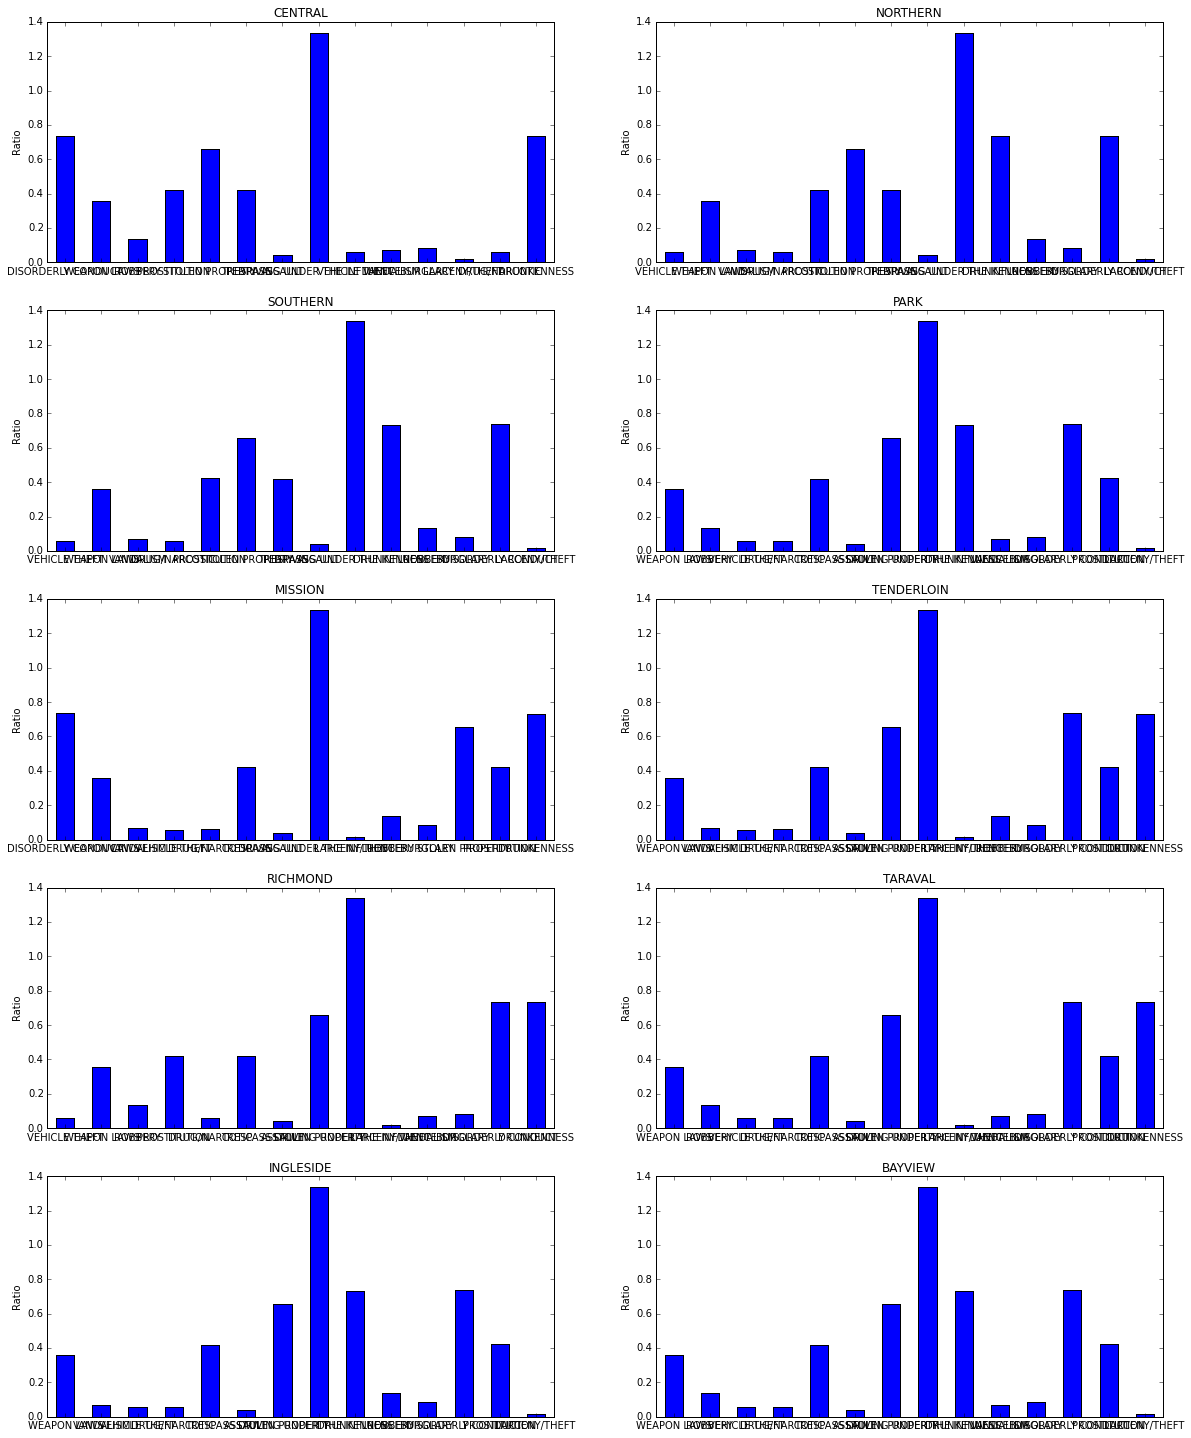

In [147]:
from collections import defaultdict
districts=defaultdict(dict)

for incedent in PCrimeDistrictPCrime.keys():
    if incedent[0] !="":
        districts[incedent[0]][incedent[1]] = PCrimeDistrictPCrime[incedent]
# set figure size
fig = plt.figure(figsize=(20, 25))

# reset standard var
plotNumber = 1
width = 0.5

# plot the crimes
for crime in districts:
    plt.subplot(5, 2, plotNumber)
    labels = districts[crime].keys()
    values = districts[crime].values() 
    indexes = np.arange(len(labels))
    plt.bar(indexes + width * 0.5, values, width)
    plt.xticks(indexes + width, labels)
    plt.ylabel('Ratio')
    plt.title(crime)
    plotNumber += 1

# plt.xlabel(labels)
plt.show()

### Comment on the top crimes in Tenderloin, Mission, and Richmond. Does this fit with the impression you get of these neighborhoods on Wikipedia?

### Even though we only plotted the ratios for our 14 focus crimes, I asked you to calculate the ratios based on all crime categories. Why do you think I wanted to include all crime types in the calculation?

# I DONT KNOW !!!!

# Assignment 1C: KNN

The goal of this exercise is to create a useful real-world version of the example on pp153 in DSFS. We know from last week's exercises that the focus crimes PROSTITUTION, DRUG/NARCOTIC and DRIVING UNDER THE INFLUENCE tend to be concentrated in certain neighborhoods, so we focus on those crime types since they will make the most sense a KNN - map

### Begin by using geoplotlib to plot all incidents of the three crime types on their own map using geoplotlib.kde(). This will give you an idea of how the varioius crimes 

In [155]:
# import geolib
import geoplotlib
from geoplotlib.utils import BoundingBox

focus = ["PROSTITUTION","DRUG/NARCOTIC","DRIVING UNDER THE INFLUENCE"]
for crime in focus:
    lat = [];
    lon = [];

    for incedent in incedents:
        if incedent["Category"] == crime:
            lat.append(float(incedent['Y']))
            lon.append(float(incedent['X']))

    geoData = {'lat': lat, 'lon': lon}

    north=np.median(geoData['lat']) + 0.04
    west=np.median(geoData['lon']) - 0.08
    south=np.median(geoData['lat']) - 0.08
    east=np.median(geoData['lon']) + 0.04

    print crime
    geoplotlib.kde(geoData, bw=5, cut_below=1e-4)
    geoplotlib.set_bbox(BoundingBox(north=north, south=south, east=east, west=west))
    geoplotlib.inline()

PROSTITUTION
('smallest non-zero count', 7.1647865443840454e-10)
('max count:', 10.918591925127725)


DRUG/NARCOTIC
('smallest non-zero count', 7.1647865443840454e-10)
('max count:', 36.00394985280073)


DRIVING UNDER THE INFLUENCE
('smallest non-zero count', 7.1647865443840454e-10)
('max count:', 0.59956026304086119)


### Next, it's time to set up your model based on the actual data. You can use the code supplied in the book or try out scikit-learn's KNeighborsClassifier. If you end up using the latter (recommended), you may want to check out this example to get a sense of the usage.

#### You don't have to think a lot about testing/trainig and accuracy for this exercise. We're mostly interested in creating a map that's not too problematic. But do calculate the number of observations of each crime-type respectively. You'll find that the levels of each crime varies (lots of drug arrests, an intermediate amount of prostitiution registered, and very little drunk driving in the dataset). Since the algorithm classifies each point according to it's neighbors, what could a consequence of this imbalance in the number of examples from each class mean for your map?

This would mean that the values from drunk driving would have a higher weight than the others.

In [ ]:
import numpy as np
import pylab as pl
from sklearn import neighbors, datasets
count =1
X=[]
Y=[]
focus = ["PROSTITUTION","DRUG/NARCOTIC","DRIVING UNDER THE INFLUENCE"]
for crime in focus:
    for incedent in incedents:
        if incedent["Category"] == crime:
            X.append([float(incedent['X']), float(incedent['Y'])])
            Y.append(count)
    count +=1
lon=[]
lat=[]
for pos in X:
    lon.append(pos[0])
    lat.append(pos[1])
# # import some data to play with
# iris = datasets.load_iris()
# X = iris.data[:, :2] # we only take the first two features. 
# Y = iris.target
    
h = .02 # step size in the mesh

knn=neighbors.KNeighborsClassifier()

# we create an instance of Neighbours Classifier and fit the data.
knn.fit(X, Y)

# Plot the decision boundary. For that, we will asign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
x_min, x_max = min(lon) - .5, max(lat) + .5
y_min, y_max = min(lat) - .5, max(lat) + .5


# x_min = 1000
# x_max = 0
# y_min = 1000
# y_max = 0

# for pos in X:
#     if pos[0] < x_min:
#         x_min = pos[0]
        
# for pos in X:
#     if pos[1] < y_min:
#         y_min = pos[1]

# for pos in X:
#     if pos[0] > x_max:
#         x_max = pos[0]

# for pos in X:
#     if pos[1] > y_max:
#         y_max = pos[1]
        
# xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

# # Put the result into a color plot
# Z = Z.reshape(xx.shape)
# pl.figure(1, figsize=(4, 3))
# pl.set_cmap(pl.cm.Paired)
# pl.pcolormesh(xx, yy, Z)

# # Plot also the training points
# pl.scatter(lon, lat,c=Y )
# pl.xlabel('Longitude')
# pl.ylabel('Latitude')

# pl.xlim(xx.min(), xx.max())
# pl.ylim(yy.min(), yy.max())
# pl.xticks(())
# pl.yticks(())

# pl.show()

#### You can make the dataset 'balanced' by grabbing an equal number of examples from each crime category. How do you expect that will change the KNN result? In which situations is the balanced map useful - and when is the map that data in proportion to occurrences useful? Choose which map you will work on in the following.

### Now create an approximately square grid of point that runs over SF. You get to decide the grid-size, but I recommend somewhere between 50×5050×50 and 100×100100×100 points. I recommend plotting using geoplotlib.dot().

### Visualize your model by coloring the grid, coloring each grid point according to it's category. Create a plot of this kind for models where each point is colored according to the majority of its 5, 10, and 30 nearest neighbors. Describe what happens to the map as you increase the number of neighbors, K.

# Assignment 1D: Multiple regression and the Red Baron

Investigate Chief Suneman's idea is that the Red Baron might pick the time of his attacks according to a pattern that we can detect using the powers of data science.

If he's right, we can identify the time of the next attack, which will help us end this insanity once and for all. Well, let's see if he is right!

### Start from all cases having Red Baron in the resolution field and use the day of the week to predict the hour of the day when he is attacking, e.g. use linear regression to infer the hour of the day based on the weekday! Again, take 4/5 of the data for training and then calculate goodness of fit using R2R2 on the rest 1/5. Don't forget to rescale your input variables! (Note 1: My goodness of fit after using the weekdays is only around 0.618). (Note 2: For multivariate regression, as always you can simply re-use the code in the DSFS book (Chapters 14-15) or scikit-learn).

### Now, add the crime year as well to the input variables! Did the goodness of fit improve? (Note: Mine did to 0.809)

### It is still low. Inspired by a movie he once watched, Chief Suneman yells: "Let's add the longitude of the crimes as well!" Is your prediction getting better? (It should, to around 0.993)

### Very nice! Why not add latitude as well? What do you find now?